In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed0
# For example, here's several helpful packages to load in 
import math
import random
import pickle
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

from sklearn.utils import shuffle

from scipy.signal import resample

import matplotlib.pyplot as plt

np.random.seed(42)

import pickle
#from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation , Dropout
from keras import backend as K
from keras.optimizers import Adam, Adamax,SGD
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/Usuario/Documents/F2 - Copia/database"))

# Any results you write to the current directory are saved as output.

['mitbih_test.csv', 'mitbih_test.csv.zip', 'mitbih_train.csv', 'mitbih_train.csv.zip', 'ptbdb_abnormal.csv', 'ptbdb_abnormal.csv.zip', 'ptbdb_normal.csv', 'ptbdb_normal.csv.zip']


In [2]:
train_df = pd.read_csv("C:/Users/Usuario/Documents/F2 - Copia/database/mitbih_train.csv", header=None)
test_df = pd.read_csv("C:/Users/Usuario/Documents/F2 - Copia/database/mitbih_test.csv", header=None)
#df = pd.concat([df, df2], axis=0)

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df.info()
dataset_row = train_df.shape[0]
dataset_size= int(dataset_row/5)
print(dataset_size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
17510


In [5]:
train_df[187]=train_df[187].astype(int)
equilibre= train_df[187].value_counts()
print(equilibre)



0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [6]:
train_df[187].value_counts()
equilibre = train_df[187].value_counts()

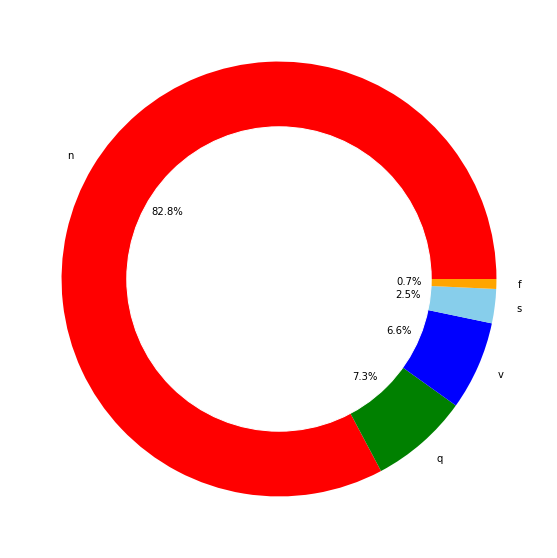

In [7]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [8]:
from sklearn.utils import resample
k=72471
#dataset_size= 2000
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=dataset_size,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=dataset_size,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=dataset_size,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=dataset_size,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=dataset_size,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [9]:
equilibre=train_df[187].value_counts()
print(equilibre)

0    17510
1    17510
2    17510
3    17510
4    17510
Name: 187, dtype: int64


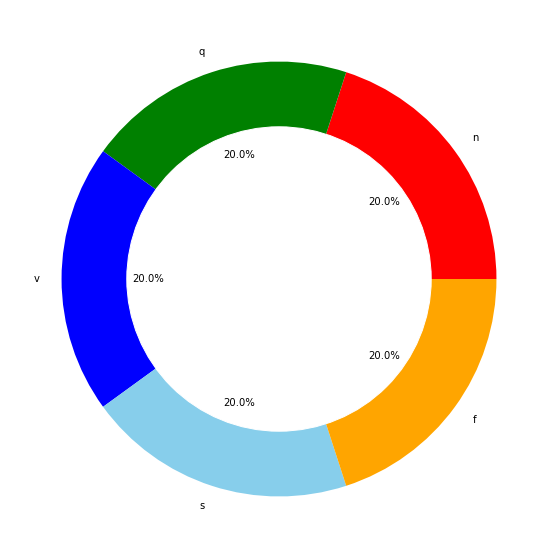

In [10]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
M = train_df.values
X = M[:, :-1]
y = M[:, -1].astype(int)

In [12]:
#del train_df
#del test_df
#del M

In [13]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)


In [14]:
#tempo=c.iloc[0,:186]
#bruiter=add_gaussian_noise(tempo)

#plt.subplot(2,1,1)
#plt.plot(c.iloc[0,:186])

#plt.subplot(2,1,2)
#plt.plot(bruiter)

#plt.show()



In [15]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [16]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [17]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

# Data augmentation

To train properly the model, we sould have to augment all data to the same level. Nevertheless, for a first try, we will just augment the smallest class to the same level as class 1. With that we will be able to have a test set of around 5x800 observations.

# Split

In [18]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (87550, 186, 1)
y_train (87550, 5)
X_test (21892, 186, 1)
y_test (21892, 5)


# Model

Now let's re-create the model from the ArXiv Document

In [19]:
n_obs, feature, depth = X_train.shape
batch_size = 1500
#batch_size = 500

In [20]:
K.clear_session()

inp = Input(shape=(feature, depth))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)
C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation('softmax')(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation('softmax')(S11)
M11 = MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation('softmax')(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation('softmax')(S21)
M21 = MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation('softmax')(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation('softmax')(S31)
M31 = MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation('softmax')(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation('softmax')(S41)
M41 = MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation('softmax')(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation('softmax')(S51)
M51 = MaxPooling1D(pool_size=5, strides=2)(A52)

M52 = (Dropout(0.25))(M51)

F1 = Flatten()(M52)

D1 = Dense(32)(F1)
A6 = Activation('softmax')(D1)
D2 = Dense(32)(A6)
D3 = Dense(5)(D2)
A7 = Softmax()(D3)

model = Model(inputs=inp, outputs=A7)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 186, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 182, 32)      192         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 182, 32)      5152        ['conv1d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 182, 32)      0           ['conv1d_1[0][0]']               
                                                                                              

In [21]:
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size)  # every epoch we do n_obs/batch_size iteration
    lrate = initial_lrate * math.exp(-k*t)
    return lrate

lrate = LearningRateScheduler(exp_decay)

In [22]:
adam3 = SGD(learning_rate = 0.01)
adam2 = Adamax(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999)
adam = Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999)

In [23]:
#model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [24]:
#epochs = 0
optimizer_range=[adam3]
batch_range = [20, 100, 500, 1500, 2500]#20, 100, 500, 1500, 2500
epochs_range= [25,50,75,100]#25,50,75,100
loss_range=['categorical_crossentropy','binary_crossentropy','huber_loss','kullback_leibler_divergence']#'categorical_crossentropy','binary_crossentropy','huber_loss','kullback_leibler_divergence','poisson'
n=0
i=0
t=0
j=0
#optimizer_range= [adamax,adam]
#itertools
for opr in optimizer_range:
    print(f"optimizer: {j}")
    for lsr in loss_range:
        print(f"Loss: {loss_range[t]}")
        for ep in epochs_range:
            print(f"Epoch number: {ep}")
            for bs in batch_range:
                print(f"fitting with batch size: {bs}")
                model.compile(loss= loss_range[t], optimizer= optimizer_range[j], metrics=['accuracy'])
                history = model.fit(X_train, y_train, 
                                    epochs=epochs_range[i], 
                                    batch_size=batch_range[n], 
                                    verbose=2, 
                                    validation_data=(X_test, y_test), 
                                    callbacks=[lrate])
                n = n+1
            n=0    
            i=i+1
        i=0
        t=t + 1
t= 0
j=0       

optimizer: 0
Loss: categorical_crossentropy
Epoch number: 25
fitting with batch size: 20
Epoch 1/25
4378/4378 - 82s - loss: 1.6095 - accuracy: 0.2008 - val_loss: 1.6098 - val_accuracy: 0.0074 - lr: 0.0010 - 82s/epoch - 19ms/step
Epoch 2/25
4378/4378 - 69s - loss: 1.6095 - accuracy: 0.1989 - val_loss: 1.6116 - val_accuracy: 0.0661 - lr: 0.0010 - 69s/epoch - 16ms/step
Epoch 3/25
4378/4378 - 76s - loss: 1.6095 - accuracy: 0.1987 - val_loss: 1.6146 - val_accuracy: 0.0254 - lr: 0.0010 - 76s/epoch - 17ms/step
Epoch 4/25
4378/4378 - 68s - loss: 1.6095 - accuracy: 0.1969 - val_loss: 1.6076 - val_accuracy: 0.8276 - lr: 0.0010 - 68s/epoch - 16ms/step
Epoch 5/25
4378/4378 - 70s - loss: 1.6095 - accuracy: 0.1980 - val_loss: 1.6048 - val_accuracy: 0.8276 - lr: 0.0010 - 70s/epoch - 16ms/step
Epoch 6/25
4378/4378 - 70s - loss: 1.6095 - accuracy: 0.1981 - val_loss: 1.6092 - val_accuracy: 0.0735 - lr: 0.0010 - 70s/epoch - 16ms/step
Epoch 7/25
4378/4378 - 71s - loss: 1.6095 - accuracy: 0.1985 - val_loss

ResourceExhaustedError: Graph execution error:

Detected at node 'model/conv1d_9/Conv1D' defined at (most recent call last):
    File "c:\Users\Usuario\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Usuario\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\Usuario\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\Usuario\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Usuario\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\Usuario\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\Usuario\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "c:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "c:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "c:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Usuario\AppData\Local\Temp\ipykernel_8468\4211327711.py", line 21, in <cell line: 12>
      history = model.fit(X_train, y_train,
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'model/conv1d_9/Conv1D'
OOM when allocating tensor with shape[2500,32,1,8] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model/conv1d_9/Conv1D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_18107927]

In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
history = model.fit(X_train, y_train, 
                                epochs=100, 
                                batch_size=2500, 
                                verbose=2, 
                                validation_data=(X_test, y_test), 
                                callbacks=[lrate])

Epoch 1/100
36/36 - 9s - loss: 0.0364 - accuracy: 0.9889 - val_loss: 2.8556 - val_accuracy: 0.6855 - lr: 0.0010 - 9s/epoch - 260ms/step
Epoch 2/100
36/36 - 7s - loss: 0.0402 - accuracy: 0.9876 - val_loss: 2.7909 - val_accuracy: 0.6851 - lr: 0.0010 - 7s/epoch - 201ms/step
Epoch 3/100
36/36 - 7s - loss: 0.0367 - accuracy: 0.9888 - val_loss: 2.8062 - val_accuracy: 0.6910 - lr: 0.0010 - 7s/epoch - 201ms/step
Epoch 4/100
36/36 - 7s - loss: 0.0372 - accuracy: 0.9885 - val_loss: 2.7817 - val_accuracy: 0.6895 - lr: 0.0010 - 7s/epoch - 201ms/step
Epoch 5/100
36/36 - 7s - loss: 0.0349 - accuracy: 0.9890 - val_loss: 2.7713 - val_accuracy: 0.6900 - lr: 0.0010 - 7s/epoch - 201ms/step
Epoch 6/100
36/36 - 7s - loss: 0.0369 - accuracy: 0.9884 - val_loss: 2.8256 - val_accuracy: 0.6853 - lr: 0.0010 - 7s/epoch - 201ms/step
Epoch 7/100
36/36 - 7s - loss: 0.0347 - accuracy: 0.9890 - val_loss: 2.7374 - val_accuracy: 0.6961 - lr: 0.0010 - 7s/epoch - 201ms/step
Epoch 8/100
36/36 - 7s - loss: 0.0361 - accuracy

In [ ]:
y_pred = model.predict(X_test, batch_size = 500)

44/44 [==============================] - 1s 14ms/step


In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78     18118
           1       0.17      0.67      0.27       556
           2       0.33      0.87      0.47      1448
           3       0.07      0.80      0.14       162
           4       0.69      0.90      0.78      1608

    accuracy                           0.68     21892
   macro avg       0.45      0.78      0.49     21892
weighted avg       0.89      0.68      0.74     21892



In [ ]:
print("ranking-based average precision : {:.3f}".format(label_ranking_average_precision_score(y_test, y_pred)))
print("Ranking loss : {:.3f}".format(label_ranking_loss(y_test, y_pred)))
print("Coverage_error : {:.3f}".format(coverage_error(y_test, y_pred)))

ranking-based average precision : 0.806
Ranking loss : 0.143
Coverage_error : 1.574


Normalized confusion matrix


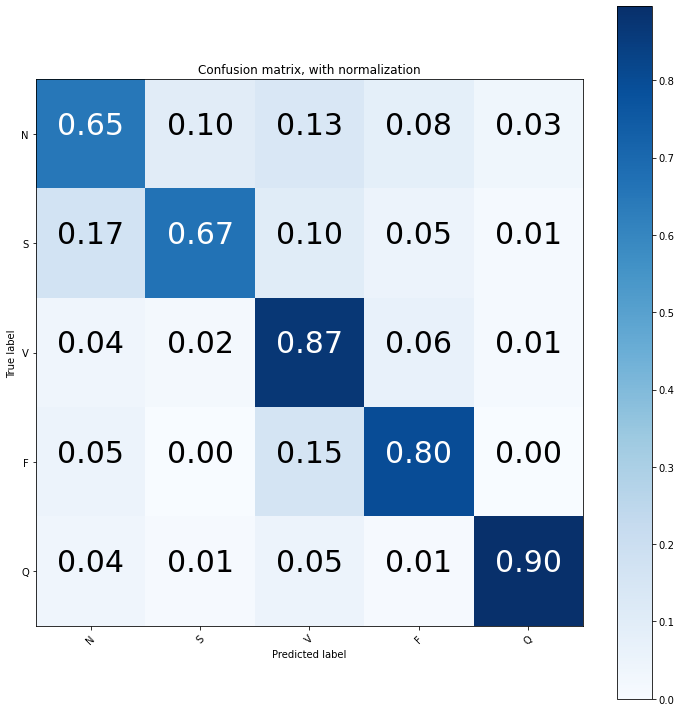

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [ ]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
RECALL = TP/(TP+FN)
# Specificity or true negative rate
SPECIFICITY = TN/(TN+FP) 
# Precision or positive predictive value
PRECISION = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
#F1-score
F1 = 2*((RECALL*PRECISION)/(RECALL+PRECISION))

In [ ]:
from statistics import mean, median
from tkinter import N
scores = model.evaluate((X_test), y_test, batch_size = 500)
scores2 = model.evaluate(X_test, y_pred, batch_size = 500)
print("Accuracy: %.2f%%" % (scores[0]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))
PRE = mean(PRECISION)
print("Precision: %.2f%%"% (PRE*100))
#print("Precision: ", PRECISION)
SPE = mean(SPECIFICITY)
print("Specificity: %.2f%%"% (SPE*100))
#print("Specificity", SPECIFICITY)
RE = mean(RECALL)
print("Recall :%.2f%%"% (RE*100))
#print("Recall", RECALL)
#print("F1: ", F1)
F1S = mean(F1)
print("F1-Score :%.2f%%"% (F1S*100))
Z= mean(1-FNR)*100
print("Recall:%.2f%%"%Z)

44/44 [==============================] - 1s 17ms/step - loss: 0.1745 - accuracy: 1.0000
Accuracy: 302.33%
Accuracy: 68.41%
Precision: 44.80%
Specificity: 92.47%
Recall :77.52%
F1-Score :48.78%
Recall:77.52%
